In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from matplotlib  import rcParams

%matplotlib inline 

In [2]:
%matplotlib inline
# rcParams["figure.figsize"] = 16,6
c = '#386B7F'

In [3]:
# upload the bank term deposit data set
# data = pd.read_csv("https://github.com/muluwork-shegaw/10Academy-week6/blob/master/data/bank-additional-full.csv?raw=true",error_bad_lines=False,sep=';')
data = pd.read_csv("data/bank-additional-full.csv", sep=';') # uncomment this on the local machine


# Task 1

#### Summery about the data

      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

1. Number of Instances: 41188 for bank-additional-full.csv

2. Number of Attributes: 20 + output attribute.
3. **Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.** 
4. Attribute information:


   1. **bank client data:**
   
   1- age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   2. **related with the last contact of the current campaign:**
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   
   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   3. **other attributes:**
   
   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   
   14 - previous: number of contacts performed before this campaign and for this client (numeric)
   
   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   4. **social and economic context attributes**
   
   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   
   17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
   
   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
   
   19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   
   20 - nr.employed: number of employees - quarterly indicator (numeric)

   5. Output variable (desired target):
   
   21 - y - has the client subscribed a term deposit? (binary: "yes","no")




### Data Glance

In [4]:
#glance the data
print("shape of the  store data: ",data.shape)
print("\n unique no of each variable\n")
print(data.nunique())
print("\n--------data summery------------\n")
print(data.info())
data.sample(10)

shape of the  store data:  (41188, 21)

 unique no of each variable

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

--------data summery------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact     

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2585,31,entrepreneur,single,basic.9y,no,no,no,telephone,may,tue,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
32577,30,blue-collar,married,basic.9y,unknown,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
7703,34,admin.,married,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
3386,26,blue-collar,single,basic.6y,no,no,yes,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
38951,38,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,3,999,0,nonexistent,-3.4,92.649,-30.1,0.719,5017.5,no
10867,31,services,single,basic.6y,no,no,no,telephone,jun,wed,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
10473,55,admin.,divorced,university.degree,no,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
3668,35,admin.,married,high.school,no,yes,yes,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
5515,46,self-employed,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
18308,44,admin.,single,basic.6y,unknown,no,no,telephone,jul,wed,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


### Univariate Analysis

In [5]:
cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
non_cat_col = data.select_dtypes(include=['int64', 'float64']).columns # non catagorical variable


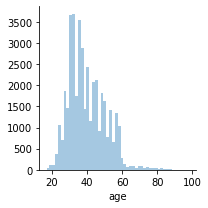

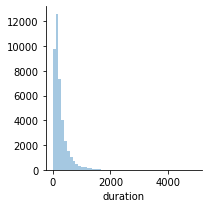

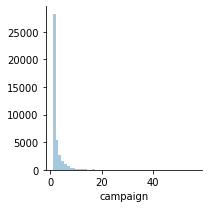

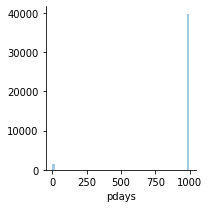

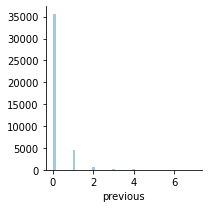

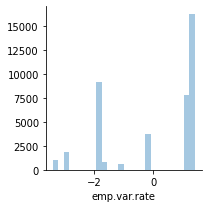

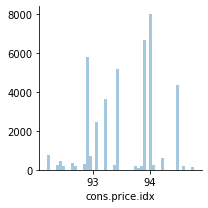

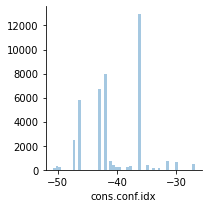

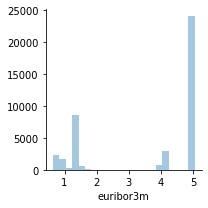

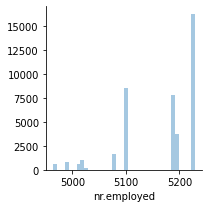

In [6]:
for  var in non_cat_col:
    g = sns.FacetGrid(data)
    g.map(sns.distplot, var,hist=True,kde=False)
    plt.show()

In [7]:

def percentage_plot(data,col = cat_col):
    total = float(len(data))
    if type(col)==str:
        plot = sns.countplot(col, data=data, order = data[col].value_counts().index)
        for p in plot.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            plot.annotate(percentage, (x, y),ha='center')

    else :
        fig, axs = plt.subplots(nrows=int(len(col)/4)+1, ncols=4, figsize=(30,10))
        for i, var in enumerate(col):
            row = i//4
            pos = i % 4
            plot = sns.countplot(var, data=data, ax=axs[row][pos],order = data[var].value_counts().index)
            for p in plot.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/total)
                x = p.get_x() + p.get_width()
                y = p.get_height()
                plot.annotate(percentage, (x, y),ha='center')



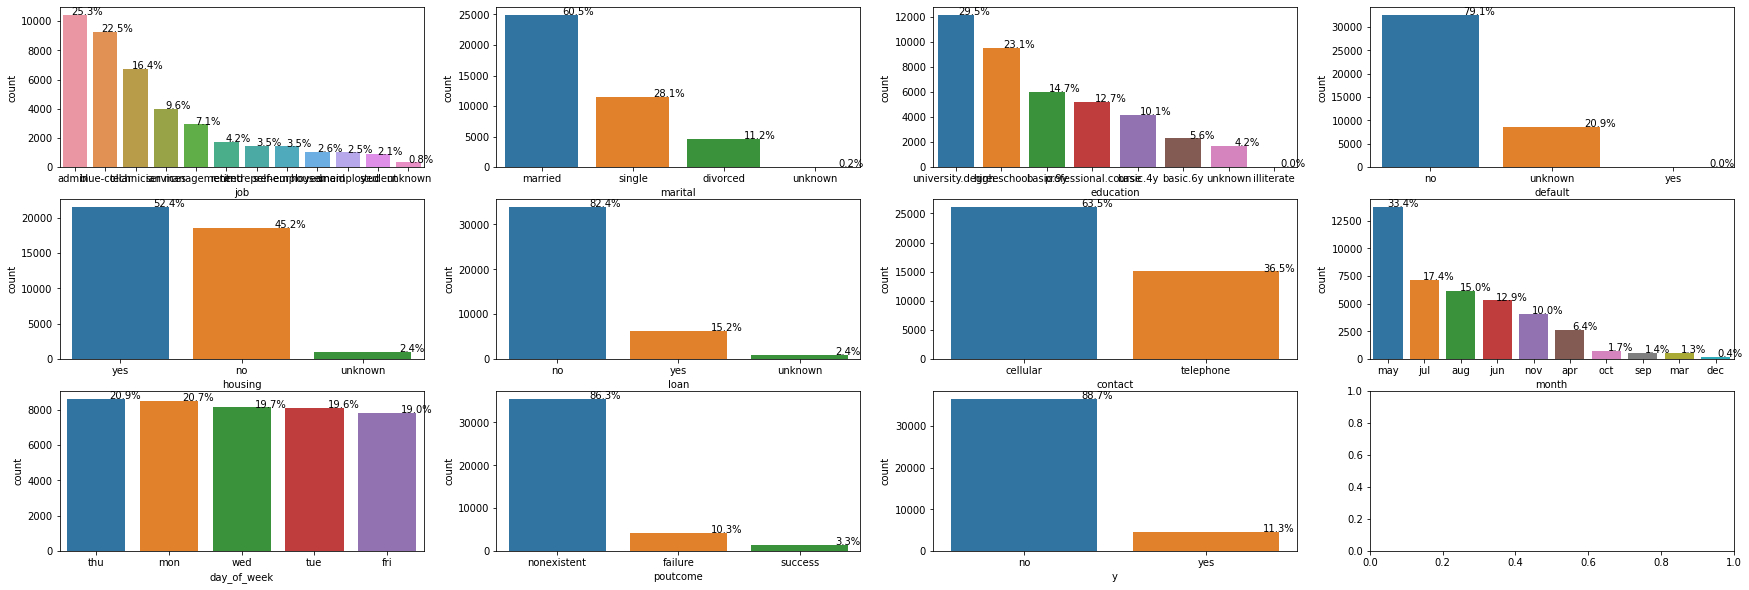

In [8]:
percentage_plot(data)



*- when we see the day_of_week ,the have equa1 probable pecentage, which means the days has no that much effect.*

**What is Imbalanced Data?**

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.

For example, we may have a 2-class (binary) classification problem with 100 instances (rows). A total of 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

This is an imbalanced dataset and the ratio of Class-1 to Class-2 instances is 80:20 or more concisely 4:1.

we can have a class imbalance problem on two-class classification problems as well as multi-class classification problems. Most techniques can be used on either.


**NB: As shown in figure above our target variable "y" 88.7 :11.3, there is class imbalance** 

soln:

1.     rater than using accuracy use other metrics like confusion matrix,recall etc.
2. Over-Sampling the minority class(yes class)
3. modeling using XGBoost is better for the data given

### Bivariate

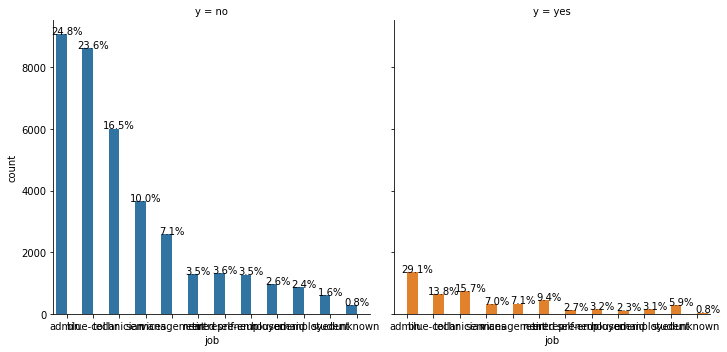

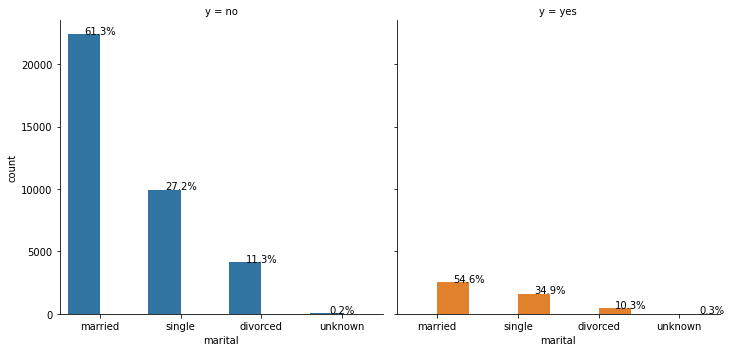

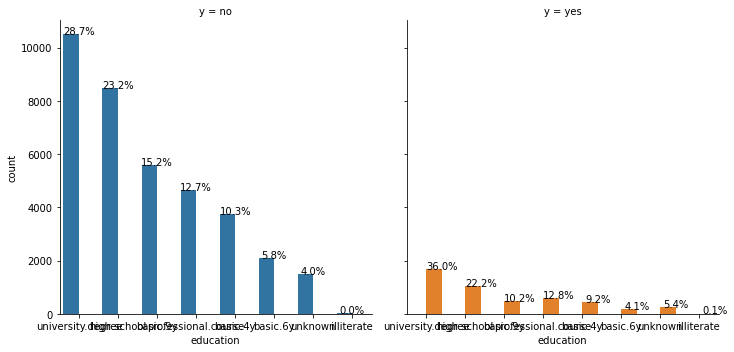

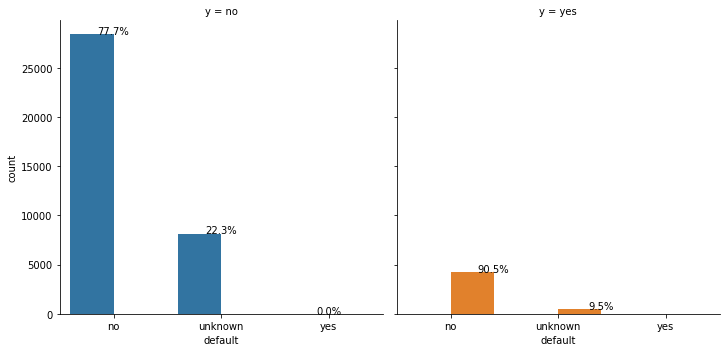

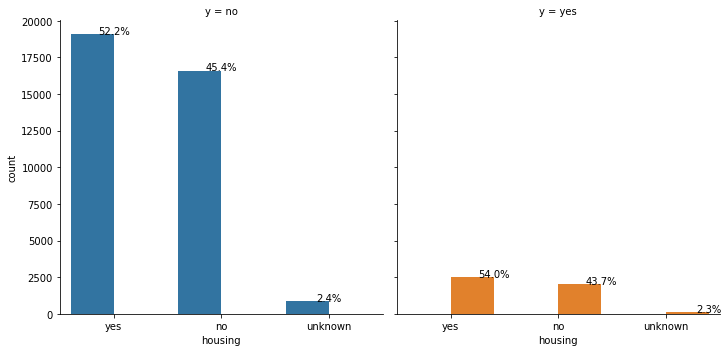

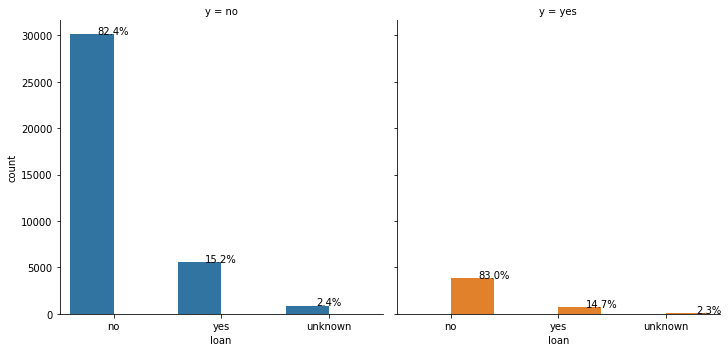

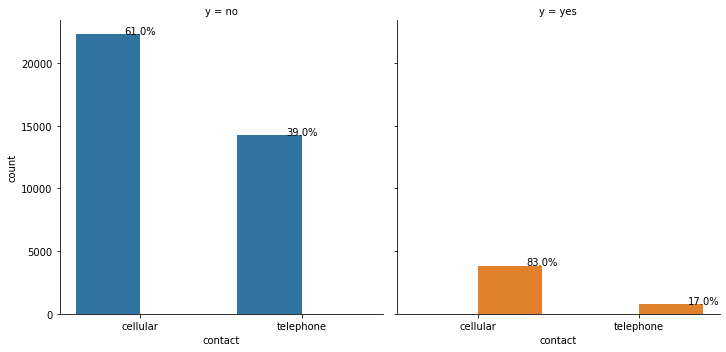

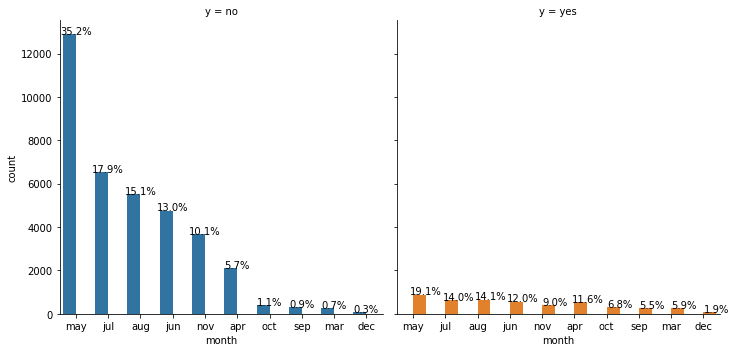

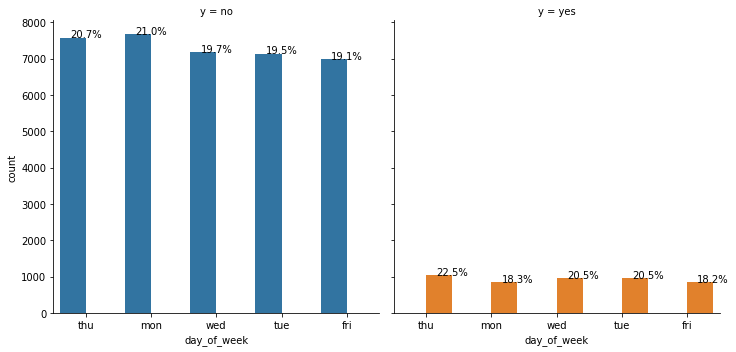

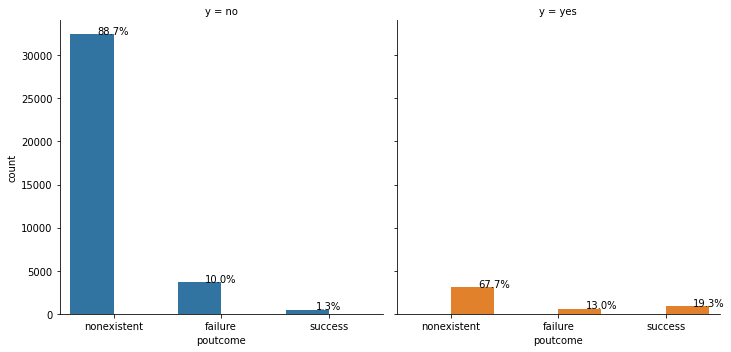

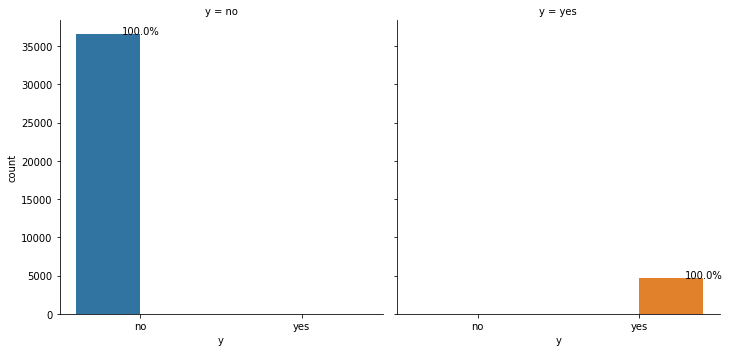

In [9]:
for  var in cat_col:
    total_1 = float(len(data[data["y"]=="no"]))
    total_2 = float(len(data[data["y"]=="yes"]))
    total =[total_1,total_2]
    i=0
    

    g = sns.catplot(x=var,kind='count', hue="y",
                col="y", data=data,order = data[var].value_counts().index)
    for ax in g.axes.ravel():
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/total[i])
                x = p.get_x() + p.get_width()
                y = p.get_height()
                ax.annotate(percentage, (x, y),ha='center')
            i =i+1

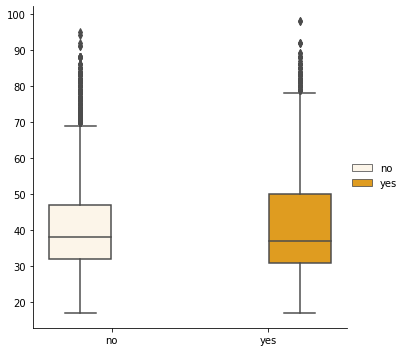

                    age



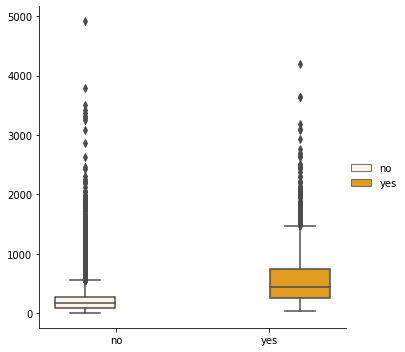

                    duration



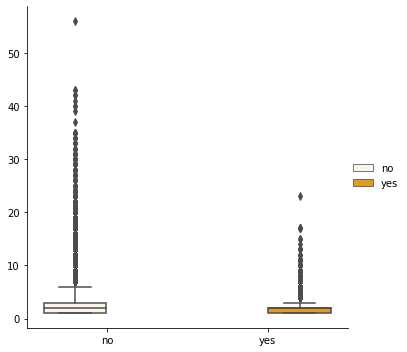

                    campaign



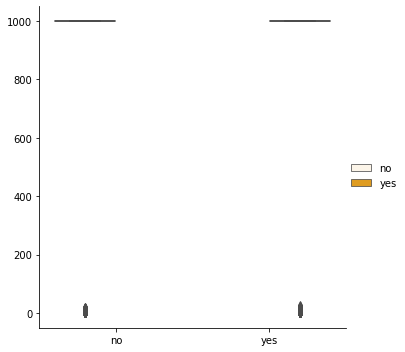

                    pdays



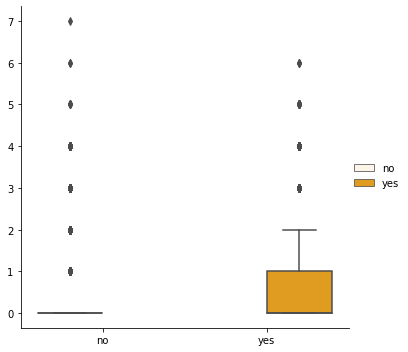

                    previous



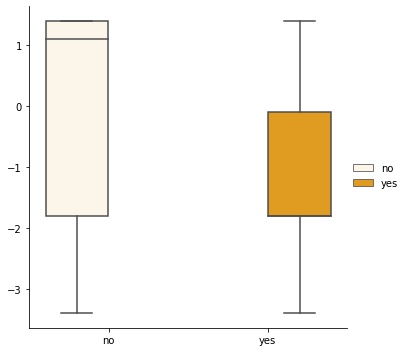

                    emp.var.rate



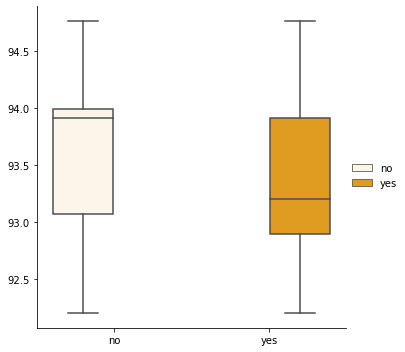

                    cons.price.idx



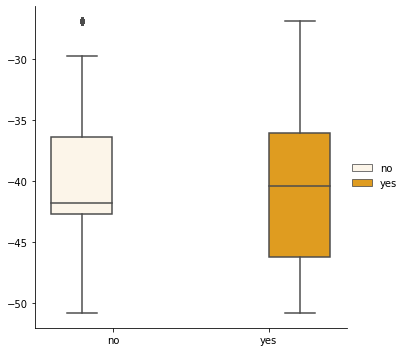

                    cons.conf.idx



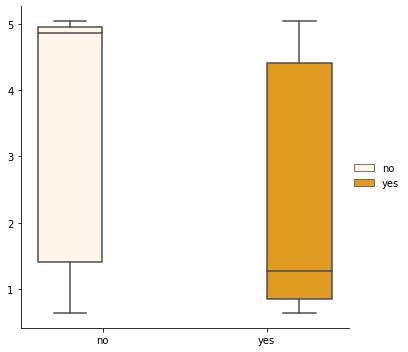

                    euribor3m



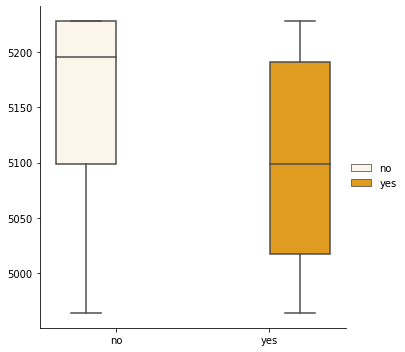

                    nr.employed



In [10]:

import warnings
warnings.filterwarnings("ignore")
for  var in non_cat_col:
    g = sns.FacetGrid(data,height=5)
    g.map(sns.boxplot,y=data[var], x=data["y"],hue=data["y"],color="orange",labels=[var])
    g.add_legend()
    plt.show()    
    print("                    {}\n".format(var))

   

In [11]:
def corr(data,col = None):
    corr_matrix = data[col].corr()

        
    mask = np.zeros_like(corr_matrix, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (11, 9))

    sns.heatmap(corr_matrix,annot=True,mask=mask, linewidths=.3,ax = ax)
    plt.show()
    return corr_matrix

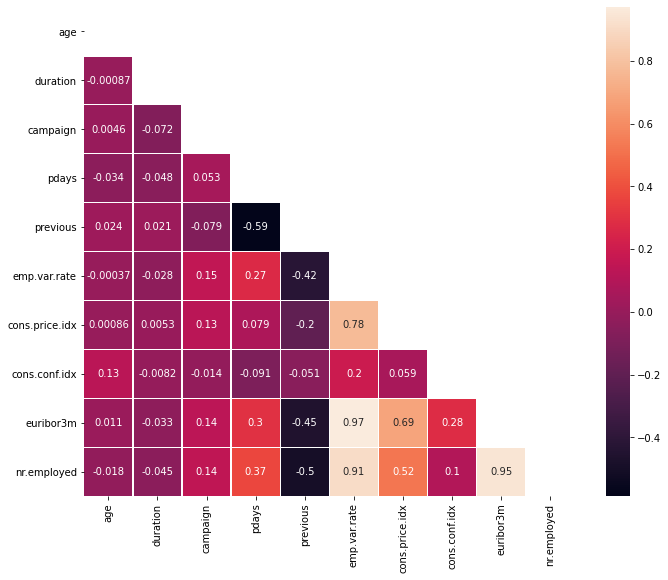

In [12]:
corr_matrix=corr(data,non_cat_col)


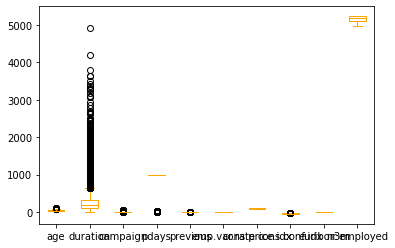

In [13]:
data[non_cat_col].plot(kind = 'box',showfliers = True,color = "orange") #with outliers


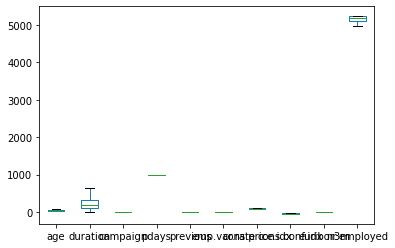

In [14]:
data[non_cat_col].plot(kind = 'box',showfliers = False)#without outliers


# Preprocessing

Since our dataset has many variables(20 features with out the target variable) and unknow value , we should carefull when we deal with outliers,missing value and dimentionality reduction since there is a class imbalance between "yes" and "no" in [y] variable as shown in figure above, we may biase  our model unless we consider such things.

In [15]:

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# from keras.models import Model
# from Keras.layers  import Input,Dense
# from keras import regularizers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import time
time_start = time.time()


class PreProcessor:

    def __init__(self,data,target=None,drop_col=None,outlier_col=None,reduction_model=None,dim=None):
        self.data = data
        self.orig_data = data
        self.target = target
        self.drop_col =drop_col
        self.outlier_col =outlier_col
        
        self.reduction_model = reduction_model
        self.dim = dim
        
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.y_pred = None

        
        

    '''
       Missing Value Ratio
       calculate the missing value ration
       and drop that variable if it's missing value ratio 
       is greater than 20% and otherwise impute or drop that
       value

    ''' 

    def treat_missing(self,data):#feature selection based on missing value ratio
        cat_col = self.data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
        non_cat_col = self.data.select_dtypes(include=['int64', 'float64']).columns # non catagorical variable
    
        data[cat_col] = data[cat_col].replace(['unknown', 0], np.nan)
        missing_value = data.isnull().sum()/len(data)*100
        missing_var = []
        for i,col in enumerate(self.data.columns):
            if missing_value[i]>=20:   #setting the threshold as 20%
                missing_var.append(col)
                data.drop(col, axis=1,inplace=True)
        print("\n {} variables have dropped based on missing value ratio".format(missing_var))
          
        '''
            since the rest variable's missing value is 
            smaller we can impute them
        '''
        print("\n {} missing values have been dropped".format(data.isnull().sum().sum()))
        data=data.fillna(data.mode().iloc[0])
        
        self.data = data
        return data
    '''
        we may need to drop a columns which have a less variance and
        more correlated variables, since if they are more correlated 
        they have same impact in indecating something and if they have least
        variance which means they are almost constant values.
    '''
    def drope(self,data,col=None): # which is ongoing function,not implemented in optimized way yet.
        data.drop(col,axis =1,inplace=True)
        self.cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
        self.non_cat = data.select_dtypes(include=['int64', 'float64']).columns #catagorical columns
        print("\n {} variable has been dropped based on high correlation and less variance analysis".format([col]))
        self.data = data
        return data

    def deal_outliers(self,data,columns):#handle outliers based on interquartile range(iqr)
        orig_data = data

        print("\n before dealing with the ouliers the shape of the data",
              data.shape)
        for col in columns:
            q1 = data[col].quantile(0.25) # quartile 1
            q3 = data[col].quantile(0.75) # quartile 4
            iqr = q3 - q1
            lower_bound = q1 -(1.5 * iqr) #lower whishker
            upper_bound = q3 +(1.5 * iqr) #upper whishker
            data = data[data[col]>lower_bound] #remove which are greater than upper whishker
            data = data[data[col]<upper_bound] #remove which are less than lower whishker

        print("after removing the outliers",data.shape)
        
        self.data = data
        self.orig_data = orig_data
        
        print("{}  data has been removed based on outlier analysis".format(len(self.orig_data)-len(self.data)))
        return data # return data with outlier and without outlier
    
    def encoder(self,data):# encode the catagorical value
        label_encoder = LabelEncoder()
        binary_col = []
        for col in (data.columns):
            if data[col].nunique() == 2:
                binary_col.append(col)
                data[col] = label_encoder.fit_transform(data[col])# encode binary variables
        print("\n{} variables have been encoded based on label encoding the rest encoded as dummy variable".format(binary_col))
        
        data = pd.get_dummies(data) #encode not binary variables
        self.data = data
        return data
    
    def scaler(self,data, scaler= MinMaxScaler()): # not implmented in optimized way yet
        data[:] = scaler.fit_transform(data[:]) #scaleing the given data
        self.data = data
        print("\n---- Scaling the data based on",scaler)
        return data
    
    def reduce_dimension(self,data,reduction_model = 'tsne',dim=3): # reduce the dimentions of a given data
        target = self.target
        data_1 = data
        d = data_1.drop(target,axis=1)
        
        print("\nThe data is reduced based on {0} algorithm to {1} dimentions".format(reduction_model,dim+1))
        print("Executing the reduction starts and wait ......")
        
        if reduction_model =='pca': # using PCA
            pca = PCA(n_components=dim)
            reduced_df = pd.DataFrame(pca.fit_transform(d), # reduce the dimention and convert to data frame
               columns=[f'pca {i}'  for i in range(1,dim+1)]) 
            print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
            
        elif reduction_model =='tsne':
            tsne = TSNE(n_components = dim, n_iter = 300)
            reduced_df =pd.DataFrame(tsne.fit_transform(d),
                        columns=[f'tsne {i}'  for i in range(1,dim+1)])
            print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    #     else:
    #         input_dim = d.shape[1]
    #         input_layer = Input(shape = (input_dim,))
    #         encoder_layer_1 = Dense(40,activation='tanh',
    #                         activity_regularizer=regularizers.l1(10e-5)(input))(input_layer)
    #         encoder_layer_2 = Dense(30,activation='tanh')(encoder_layer_1)
    #         encoder_layer_3 = Dense(encoding_dim,activation='tanh')(encoder_layer_2)
    #         #create encoder model
    #         encoder = Model(inputs = input_layer, outputs = encoder_layer_3)
    #         reduced_df= pd.DataFrame(encoder.predict(d))
                   
    # reset the index to get clean data(without nan)              
        
        data_1[target].reset_index(drop=True, inplace=True)
        reduced_df.reset_index(drop=True, inplace=True)
        final_df = pd.concat([reduced_df,data_1[target]],axis=1)
                   
        self.data = final_df
        return final_df
    
    def split_data(self,data,target):  #Split the data
        
        print("\nspliting the data as train and test")
        X=data.drop(target,axis=1)
        y=data[target]
        from sklearn.datasets import make_classification
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify =y,random_state=1)#use stratified kfold distribution for imbalanced class distributin
        return X_train, X_test, y_train, y_test
                   
    def pipe_and_filter(self):# this function is to pipe earlier steps
        new = self.treat_missing(self.data)
        new = self.drope(self.data,col= self.drop_col)
        new = self.deal_outliers(self.data,columns = self.outlier_col)
        new = self.encoder(self.data)
        new_scaled = self.scaler(self.data)
        new = self.reduce_dimension(self.data,reduction_model = self.reduction_model,dim=self.dim)
        X_train, X_test, y_train, y_test =self.split_data(self.data,self.target)
        print("DONE!")
        
        result = [X_train, X_test, y_train, y_test]
        df =[new_scaled, new]
                   
        return df,result
        
        
            
        
    

In [18]:
new_cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
corr_matrix = data.drop(new_cat_col, axis = 1).corr()
co =corr_matrix.unstack().sort_values().drop_duplicates() 

print("variance of data\n\n",data.var().sort_values())
pd.DataFrame(co,columns=['correlation']).tail(3)


variance of data

 previous              0.244927
cons.price.idx        0.335056
emp.var.rate          2.467915
euribor3m             3.008308
campaign              7.672975
cons.conf.idx        21.420215
age                 108.602451
nr.employed        5220.283250
pdays             34935.687284
duration          67225.728877
dtype: float64


,,correlation
nr.employed,euribor3m,0.945154
emp.var.rate,euribor3m,0.972245
age,age,1.000000


- Since  emp.var.rate ,euribor3m & nr.employed are highly correlated and the variance of emp.var.rate and euribor3m is less variance  we can drop emp.var.rate and euribor3m 
- we can drop day_of week too since it has equal probable

In [20]:
outlier_col = ['age', 'campaign','cons.conf.idx']
drop_col =  ["emp.var.rate","euribor3m",'day_of_week',"duration"]


In [22]:
processor = PreProcessor(data,'y',drop_col,outlier_col,"pca",7)
new_data,split_result = processor.pipe_and_filter()


 ['default'] variables have dropped based on missing value ratio

 4121 missing values have been dropped

 [['emp.var.rate', 'euribor3m', 'day_of_week', 'duration']] variable has been dropped based on high correlation and less variance analysis

 before dealing with the ouliers the shape of the data (41188, 16)
after removing the outliers (36967, 16)
4221  data has been removed based on outlier analysis

['housing', 'loan', 'contact', 'y'] variables have been encoded based on label encoding the rest encoded as dummy variable

---- Scaling the data based on MinMaxScaler()

The data is reduced based on pca algorithm to 8 dimentions
Executing the reduction starts and wait ......
PCA done! Time elapsed: 131.06233286857605 seconds

spliting the data as train and test
DONE!


In [23]:
#for later use
scaled_data = new_data[0]
reduced_data =new_data[1]

X_train =split_result[0]
X_test = split_result[1]
y_train =split_result[2]
y_test = split_result[3]


In [24]:
reduced_data

,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,y
0,-1.059708,0.302066,-0.435103,0.264845,-0.012814,0.323075,0.328023,0.0
1,-0.931673,0.602110,-0.253687,0.296361,1.008917,0.207655,0.431498,0.0
2,-0.830385,0.543374,-0.059540,0.367467,0.910922,-0.715347,0.161527,0.0
3,-0.700793,0.338944,-0.759113,0.534473,0.313999,0.312706,0.084059,0.0
4,-0.922736,0.593325,-0.252046,0.305319,1.011549,0.159220,0.409274,0.0
5,-1.101563,0.479168,-0.240326,0.256592,0.085803,0.342349,0.211545,0.0
6,-0.673656,0.277187,-0.711636,0.378716,0.268324,0.171436,0.569953,0.0
7,-0.867762,0.210179,-0.721822,0.486032,-0.559452,0.471941,-0.053222,0.0
8,0.131906,1.157909,0.041619,-0.257020,-0.591441,-0.848833,1.046873,0.0
9,0.082286,1.494185,0.135245,0.081896,0.581704,-0.668179,0.076141,0.0


# Modeling

In [25]:
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import scipy.stats as stat
from sklearn import svm

from sklearn.metrics import *
import datetime

In [26]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [32]:
class ClassifierModeling:
    def __init__(self,model_name,X_train=None,y_train=None,X_test=None,y_test=None,kfold=None):
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.kfold =kfold
        self.y_pred = None
        self.model_name = model_name
        if self.model_name== "RandomForestClassifier":
            self.model = RandomForestClassifier()
        elif self.model_name == "LogisticRegression":
            self.model = LogisticRegression(solver='saga', random_state=0)
        elif self.model_name == "DecisionTreeClassifier":
            self.model = DecisionTreeClassifier()
        elif self.model_name == "XG_Boost":
            data_dmatrix = xgb.DMatrix(data=self.X_train,label=self.y_train)
            self.model = xgb.XGBClassifier()
        elif self.model_name =="Multilayer Perceptron":
            print("not implemented yet")
        elif self.model_name == "svm" :
            self.model = svm.SVC(kernel='linear', C=0.01)
        elif self.model_name == "adboost":
             self.model =AdaBoostClassifier()
        elif self.model_name == "gradienBoost":
             self.model = GradientBoostingClassifier()
        
    def fit(self):
        self.model.fit(self.X_train,self.y_train)

    def get_predicate(self): 
        self.y_pred = pd.Series(self.model.predict(self.X_test),name ="predict")
        return self.y_pred 
    def get_MSE(self):
        return mean_squared_error(self.y_test,self.y_pred)
    def get_score(self):
        return -(r2_score(self.y_test,self.y_pred))
        
    def get_loss(self):
        return np.sqrt(mean_squared_error(self.y_test,self.y_pred))
    def validate_model(self):
        print
        model_fit =pd.DataFrame()
        model_fit = pd.concat([self.y_pred, self.y_test], axis=1)
        matrix = confusion_matrix(self.y_test, self.y_pred)

        total = float(len(model_fit))
        fig, axs = plt.subplots(1,3,squeeze=False,figsize=(15, 3))
        plt.rcParams.update({'font.size': 10})
        d= plot_confusion_matrix(self.model, self.X_test, self.y_test,
                                             display_labels=["yes","no"],
                                             cmap=plt.cm.Blues,ax=axs[0,2])
        d.ax_.set_title("{} confusion matrix".format(self.model_name))
        


        for ax in axs.flatten():
            
            for i, var in enumerate(model_fit.columns):
                ax  = sns.countplot(var, data=model_fit, ax=axs[0][i])
                ax .set_title(self.model_name)
                for p in ax.patches:
                    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
                    x = p.get_x() + p.get_width()
                    y = p.get_height()
                    ax .annotate(percentage, (x, y),ha='center')
        #fig.savefig("https://github.com/muluwork-shegaw/10Academy-week6/blob/master/data/{}.png".format(self.model_name))
     
        return matrix,model_fit
    def get_eff_model(self):
        if self.model_name != "svm":
        
            metrics = pd.DataFrame()
            metrics["model"] = [self.model_name]
            metrics["MSE"] = mean_squared_error(self.y_test,self.y_pred)
            metrics["Loss"] = np.sqrt(mean_squared_error(self.y_test,self.y_pred))
            metrics["Score"] = -(r2_score(self.y_test,self.y_pred))
            metrics["Kappa"] = cohen_kappa_score(self.y_test, self.y_pred)
            metrics["ROC_Auc"] = roc_auc_score(self.y_test, self.y_pred)
            metrics["precision"] = precision_score(self.y_test, self.y_pred)
            metrics["recall"] = recall_score(self.y_test, self.y_pred)
            metrics["f1_score"] = f1_score(self.y_test, self.y_pred)
            metrics["accuracy"] = accuracy_score(self.y_test, self.y_pred)
        

        
            return metrics
    def get_accuracy_with_kfold(self):
       
        return cross_val_score(self.model,self.X_test, self.y_test,cv=self.kfold, scoring= 'accuracy').mean()
        
    def get_loss_with_kfold(self,valid_data,valid_targ,k_fold):
        return -(cross_val_score(self.model,self.X_test, self.y_test,cv=self.kfold, scoring= 'neg_log_loss').mean())
    def eff_model_with_kfold(self):
        if self.model_name != "svm":

            scoring = ["accuracy","neg_log_loss","r2",
                 "neg_mean_squared_error","neg_mean_absolute_error"] 

            metrics = pd.DataFrame()
            metrics["model"] = [self.model_name]
            for scor in scoring:
                score = []
                result = cross_val_score(estimator= self.model, X=self.X_test, y= self.y_test,cv=self.kfold,scoring=scor )
                score.append(result.mean())

                metrics[scor] =pd.Series(score)

            return metrics
        
    def get_feature_impo(self):
        if self.model_name != "LogisticRegression":
            feat_importance = pd.Series(self.model.feature_importances_, index=self.X_train.columns)
            feat_importance.plot(kind='bar')
            plt.show()
        return feat_importance
    def get_summary(self):# for feature importance of logistic regression
        if self.model_name == "LogisticRegression":

            denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
            denom = np.tile(denom,(X.shape[1],1)).T
            F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
            Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
            sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
            z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
            p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values

            z_scores = z_scores
            p_values = p_values
            sigma_estimates = sigma_estimates
            F_ij = F_ij

            summary= pd.DataFrame()
            summary["features"] = self.X_train.columns
            summary["z_score"] = self.z_scores
            summary["p_value"] = self.p_values
            sns.barplot(summary["features"],summary["p_value"], data=summary)
        return summary

    def save_model(self):
        
        now = datetime.datetime.now().strftime('%Y-%m-%d')
        # Saving model to disk
        filename = now + '.pkl'
        pickle.dump(self.model, open(filename, 'wb'))
        return filename
               
        '''
        use stratified k-fold cross-validation 
        with imbalanced datasets to preserve the 
        class distribution in the train and test 
        sets for each evaluation of a given model.
        '''

    def make_it_stratified(self,data,target,reduction_model='pca',dim=7,show=False):
        X=data.drop(target,axis=1)
        y=data[target]
 
        eff_kfold =[]
        eff =[]
        model_pred = []
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

        #enumerate the splits and summarize the distributions
        i=0
        for train_ix, test_ix in kfold.split(X, y):
            i =i+1
            print("k_fold -{}   with {} model".format(i,self.model_name))

            if reduction_model =='pca': # using PCA
                pca = PCA(n_components=7)
                reduced_df = pca.fit_transform( X) # reduce the dimention and convert to data frame
                      # columns=[f'pca {i}'  for i in range(1,8)]) 
              
            elif reduction_model =='tsne':# using TSNE
                tsne = TSNE(n_components = 7, n_iter = 300)
     
            # select rows
            self.X_train,self.X_test = reduced_df[train_ix], reduced_df[test_ix]
            self.y_train, self.y_test = y[train_ix], y[test_ix]

            self.fit()
            self.get_predicate()
            if show == True:
                matrix,model_fit=self.validate_model()
                model_pred.append(model_fit)
    
            eff.append(self.get_eff_model())    

            
        df_eff = pd.concat(eff)
        df_eff =pd.DataFrame(df_eff.mean()).transpose()
        df_eff.index=[self.model_name]

        return df_eff,model_pred
            
        

# Analysis

In [28]:
classifiers =["RandomForestClassifier","LogisticRegression",
              "DecisionTreeClassifier", "XG_Boost","gradienBoost","adboost"]

In [29]:
eff =[]
model_pred = []
for model_classifier in classifiers:
    classifier = ClassifierModeling(model_classifier)

    df_eff,model_pred = classifier.make_it_stratified(data=scaled_data,target="y")
    eff.append(df_eff)
    model_pred.append(model_pred)


k_fold -1   with RandomForestClassifier model
k_fold -2   with RandomForestClassifier model
k_fold -3   with RandomForestClassifier model
k_fold -4   with RandomForestClassifier model
k_fold -5   with RandomForestClassifier model
k_fold -1   with LogisticRegression model
k_fold -2   with LogisticRegression model
k_fold -3   with LogisticRegression model
k_fold -4   with LogisticRegression model
k_fold -5   with LogisticRegression model
k_fold -1   with DecisionTreeClassifier model
k_fold -2   with DecisionTreeClassifier model
k_fold -3   with DecisionTreeClassifier model
k_fold -4   with DecisionTreeClassifier model
k_fold -5   with DecisionTreeClassifier model
k_fold -1   with XG_Boost model
k_fold -2   with XG_Boost model
k_fold -3   with XG_Boost model
k_fold -4   with XG_Boost model
k_fold -5   with XG_Boost model
k_fold -1   with gradienBoost model
k_fold -2   with gradienBoost model
k_fold -3   with gradienBoost model
k_fold -4   with gradienBoost model
k_fold -5   with gradienBo

In [30]:
df = pd.concat(eff)
df

,MSE,Loss,Score,Kappa,ROC_Auc,precision,recall,f1_score,accuracy
RandomForestClassifier,0.123894,0.351981,0.261814,0.192558,0.575269,0.377452,0.189216,0.252020,0.876106
LogisticRegression,0.110369,0.332218,0.124061,0.000000,0.500000,0.000000,0.000000,0.000000,0.889631
DecisionTreeClassifier,0.152623,0.390665,0.554400,0.183091,0.587247,0.284393,0.253431,0.267924,0.847377
XG_Boost,0.110071,0.331769,0.121031,0.013431,0.503817,0.633554,0.008333,0.016424,0.889929
gradienBoost,0.109990,0.331646,0.120204,0.031165,0.509015,0.563397,0.020098,0.038725,0.890010
adboost,0.110639,0.332624,0.126816,0.002119,0.500599,0.222857,0.001716,0.003405,0.889361


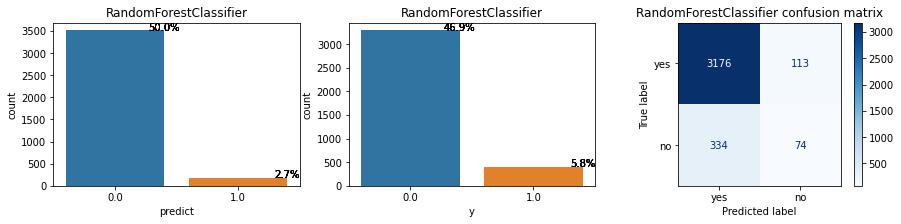

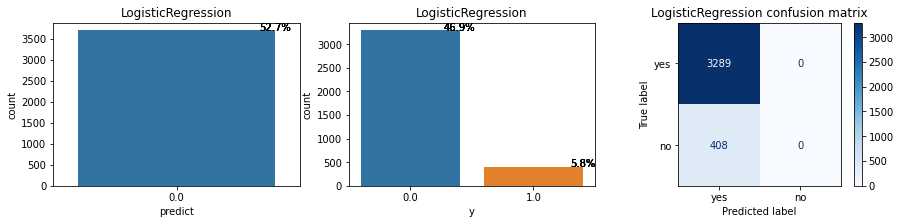

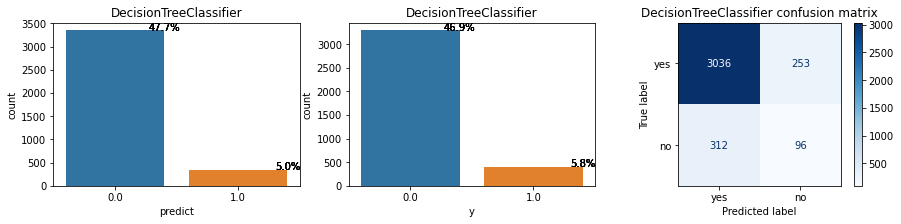

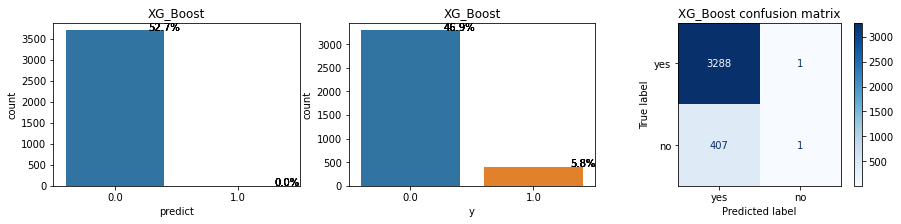

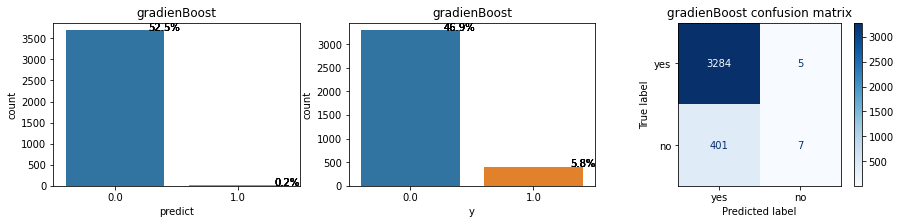

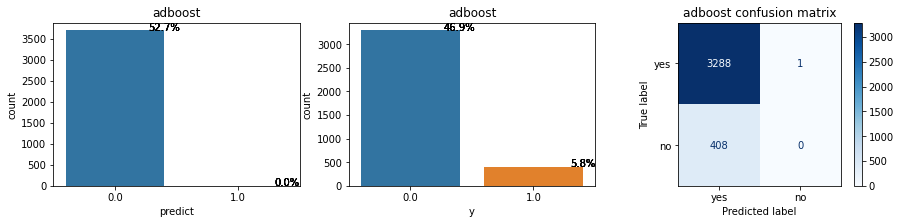

In [33]:
eff_kfold =[]
eff =[]
mode = []
for model_classifier in classifiers:
    classifier = ClassifierModeling(model_classifier,X_train,y_train,X_test,y_test,k_fold)
    classifier.fit()
    pridict = classifier.get_predicate()
    matrix,model_fit=classifier.validate_model()
    mode.append(model_fit)
    
    eff_kfold.append(classifier.eff_model_with_kfold())
    eff.append(classifier.get_eff_model())    


- **A confusion matrix** is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

In [77]:
c= y_test
d= classifier.y_pred
a = pd.concat([c,d],axis=1)

a

,y,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3692,0.0,0.0
3693,0.0,0.0
3694,0.0,0.0
3695,0.0,0.0


In [85]:
df = pd.concat(eff)
df

,model,MSE,Loss,Score,Kappa,ROC_Auc,precision,recall,f1_score,accuracy
0,RandomForestClassifier,0.124425,0.352740,0.267311,0.181928,0.570458,0.368687,0.178922,0.240924,0.875575
0,LogisticRegression,0.110360,0.332204,0.124050,0.000000,0.500000,0.000000,0.000000,0.000000,0.889640
0,DecisionTreeClassifier,0.154179,0.392656,0.570364,0.172163,0.581646,0.275000,0.242647,0.257812,0.845821
0,XG_Boost,0.110360,0.332204,0.124050,0.003805,0.501073,0.500000,0.002451,0.004878,0.889640
0,adboost,0.110360,0.332204,0.124050,0.011330,0.503220,0.500000,0.007353,0.014493,0.889640
0,gradienBoost,0.109278,0.330572,0.113030,0.031991,0.509196,0.666667,0.019608,0.038095,0.890722


In [86]:
df_kfold =pd.concat(eff_kfold)
df_kfold

,model,accuracy,neg_log_loss,r2,neg_mean_squared_error,neg_mean_absolute_error
0,RandomForestClassifier,0.871519,-0.563800,-0.297523,-0.128482,-0.128753
0,LogisticRegression,0.889640,-0.321751,-0.124050,-0.110360,-0.110360
0,DecisionTreeClassifier,0.812553,-6.327168,-0.845713,-0.182847,-0.184201
0,XG_Boost,0.890181,-0.322230,-0.118564,-0.109819,-0.109819
0,adboost,0.888288,-0.665106,-0.137825,-0.111712,-0.111712
0,gradienBoost,0.888017,-0.326720,-0.135053,-0.111442,-0.111712
